# Forecasting moss & lichen fractional cover mean
## with a Neural Network using Keras
## (Reading X and Y train/test files stored locally)
#
# For lichen output only

In [1]:
pip install tensorflow tables --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
print('Starting imports')
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn  as sns
from tensorflow import keras
import keras.utils
print('Finished imports')

Starting imports


2023-03-22 14:00:16.789084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 14:00:16.923420: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 14:00:16.923484: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-22 14:00:17.584634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Finished imports


In [3]:
Hlayers = 8
Olayers = 1
epochs = 32
Hactivation = 'relu'
Oactivation='sigmoid'
print('Hidden layers = ', Hlayers)
print('Output layers = ', Olayers)
print('Hidden layer activation = ', Hactivation)
print('Output layer activation = ', Oactivation)
print('Epochs = ', epochs)
expname = 'TP3_365d_mean_' + str(Hlayers) + 'Hlayers-' + str(Olayers) + 'Olayers-' + str(epochs) + 'epochs-' + Hactivation + '-' + Oactivation
print('Experiment name = ', expname)

Hidden layers =  8
Output layers =  1
Hidden layer activation =  relu
Output layer activation =  sigmoid
Epochs =  32
Experiment name =  TP3_365d_mean_8Hlayers-1Olayers-32epochs-relu-sigmoid


In [4]:
# Read local .hdf file
path = '/home/jovyan/Arctic/Vegetation_in_Troms_and_Finnmark/data/'

print('Reading X_train')
X_train_file = os.path.join(path, 'X_mean_tp3_train.hdf')
X_train = pd.read_hdf(X_train_file)
X_train.fillna(0, inplace=True)

print('Reading X_test')
X_test_file = os.path.join(path, 'X_mean_tp3_test.hdf')
X_test = pd.read_hdf(X_test_file)
X_test.fillna(0, inplace=True)

print('Reading y_train')
y_train_file = os.path.join(path, 'y_mean_tp3_train.hdf')
y_train = pd.read_hdf(y_train_file)
y_train.fillna(0, inplace=True)

print('Reading y_test')
y_test_file = os.path.join(path, 'y_mean_tp3_test.hdf')
y_test = pd.read_hdf(y_test_file)
y_test.fillna(0, inplace=True)

Reading X_train
Reading X_test
Reading y_train
Reading y_test


In [5]:
# Drop tp from inputs
#X_train.drop(X_train.columns[range(365 * 24 +1, 365 * 24 * 2 +1)], axis=1, inplace=True)
#X_test.drop(X_test.columns[range(365 * 24 +1, 365 * 24 * 2 +1)], axis=1, inplace=True)

In [6]:
# Instantiate a keras.Input class and tell it how big our input is.
print('Instantiating the Keras input class')
inputs = keras.Input(shape = X_train.shape[1])

# Create the hidden layer
print('Creating the hidden layer')
hidden_layer = keras.layers.Dense(Hlayers, activation=Hactivation)(inputs)

# Create the output layer
print('Creating the output layer')
output_layer = keras.layers.Dense(Olayers, activation=Oactivation)(hidden_layer)

# Create a Keras model
print('Creating the model')
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

#opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.2)
opt = keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, epsilon=1e-07)

# Compile the model with a Mean Square Error loss function and the Adam optimizer
print('Compiling the model')
#model.compile(optimizer='sgd', loss=keras.losses.LogCosh())
#model.compile(optimizer='sgd', loss=keras.losses.MeanSquaredError())
#model.compile(optimizer='sgd', loss=keras.losses.MeanSquaredLogarithmicError())
model.compile(optimizer= opt, loss=keras.losses.Huber())

Instantiating the Keras input class
Creating the hidden layer
Creating the output layer
Creating the model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17521)]           0         
                                                                 
 dense (Dense)               (None, 8)                 140176    
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 140,185
Trainable params: 140,185
Non-trainable params: 0
_________________________________________________________________
Compiling the model


2023-03-22 14:00:19.030363: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-22 14:00:19.030422: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-22 14:00:19.030452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-jeani): /proc/driver/nvidia/version does not exist
2023-03-22 14:00:19.030686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Train the model
print('Training the model')
history = model.fit(X_train, y_train, epochs=epochs)

Training the model
Epoch 1/32
80/80 [==============================] - 1s 5ms/step - loss: 0.0032
Epoch 2/32
80/80 [==============================] - 0s 5ms/step - loss: 9.3873e-04
Epoch 3/32
80/80 [==============================] - 0s 5ms/step - loss: 8.1475e-04
Epoch 4/32
80/80 [==============================] - 0s 5ms/step - loss: 7.7598e-04
Epoch 5/32
80/80 [==============================] - 0s 5ms/step - loss: 7.6607e-04
Epoch 6/32
80/80 [==============================] - 0s 5ms/step - loss: 7.4094e-04
Epoch 7/32
80/80 [==============================] - 0s 5ms/step - loss: 7.0834e-04
Epoch 8/32
80/80 [==============================] - 0s 5ms/step - loss: 7.1875e-04
Epoch 9/32
80/80 [==============================] - 0s 5ms/step - loss: 6.9997e-04
Epoch 10/32
80/80 [==============================] - 0s 5ms/step - loss: 7.0230e-04
Epoch 11/32
80/80 [==============================] - 0s 5ms/step - loss: 6.8845e-04
Epoch 12/32
80/80 [==============================] - 0s 5ms/step - los

Generating the history loss plot


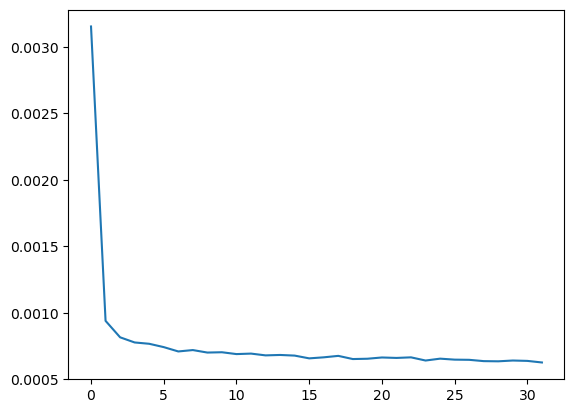

In [8]:
# Plot the loss history
print('Generating the history loss plot')
lineplot = sns.lineplot(x=history.epoch, y=history.history['loss'])
fig = lineplot.get_figure()
loss_fig_file = os.path.join(path, 'outputs/' + expname + '_loss.png')
fig.savefig(loss_fig_file) 

In [9]:
model_file = os.path.join(path, 'outputs/' + expname + '.h5')
model.save(model_file)

In [10]:
# Perform a prediction
print('Forecasting', y_test.sum())
y_forecast = model.predict(X_test).tolist()

Forecasting new_Lichen_mean    44.700092
dtype: float64
20/20 [==============================] - 0s 4ms/step


In [11]:
y_forecast = pd.DataFrame(y_forecast)

In [12]:
y_forecast.columns = ['Forecasted_lichen']

In [13]:
y_forecast

,Forecasted_lichen
0,0.023988
1,0.111837
2,0.086712
3,0.105287
4,0.051992
...,...
629,0.098925
630,0.081679
631,0.102543
632,0.065293


In [14]:
y_test = y_test.reset_index().drop(columns=['index'])

In [15]:
x_test = X_test['Lichen_mean'].reset_index().drop(columns=['index'])

In [16]:
# Obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test['new_Lichen_mean'], y_forecast['Forecasted_lichen'], 1)

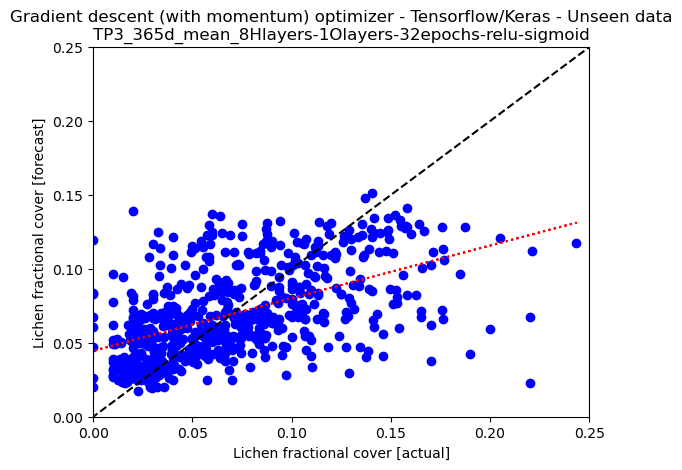

In [17]:
# Forecast vs. actual Values xy-plot - Unseen data

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(y_test, y_forecast, marker = 'o', c = 'blue')
plt.plot([-5,20], [-5,20], color = 'black', ls = '--')
plt.plot(y_test['new_Lichen_mean'], m * y_test['new_Lichen_mean'] + b, color = 'red', ls = 'dotted')

plt.ylabel('Lichen fractional cover [forecast]')
plt.xlabel('Lichen fractional cover [actual]')
plt.title('Gradient descent (with momentum) optimizer - Tensorflow/Keras - Unseen data\n' + expname)

plt.ylim(0., 0.25)
plt.xlim(0., 0.25)

plt.axis(True)
plt.show()

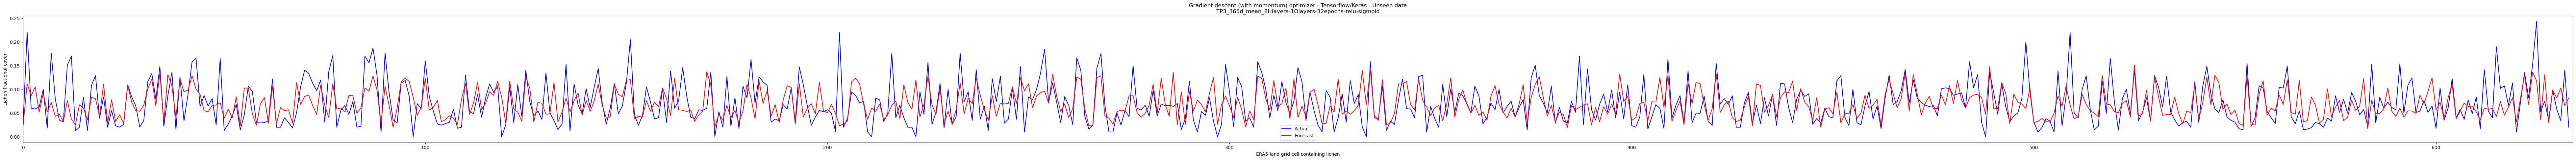

In [18]:
# Forecast vs. actual Values linear-plot - Unseen data

fig = plt.figure(figsize=(100, 5))
ax = fig.add_subplot(111)

plt.plot(y_test, c = 'blue')
plt.plot(y_forecast, c = 'red')
#plt.plot(x_test, c = 'yellow')

plt.ylabel('Lichen fractional cover')
plt.xlabel('ERA5-land grid cell containing lichen')
plt.title('Gradient descent (with momentum) optimizer - Tensorflow/Keras - Unseen data\n' + expname)

plt.xlim(0., len(y_test))
ax.legend(['Actual', 'Forecast'])
#ax.legend(['Actual', 'Forecast', 'Old'])

In [19]:
# Perform a prediction on the training data
print('Forecasting', y_train.sum())
y_check = model.predict(X_train).tolist()

Forecasting new_Lichen_mean    180.668193
dtype: float64
80/80 [==============================] - 0s 3ms/step


In [20]:
y_check = pd.DataFrame(y_check)

In [21]:
y_check.columns = ['Forecasted_lichen']

In [22]:
# Obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train['new_Lichen_mean'], y_check['Forecasted_lichen'], 1)

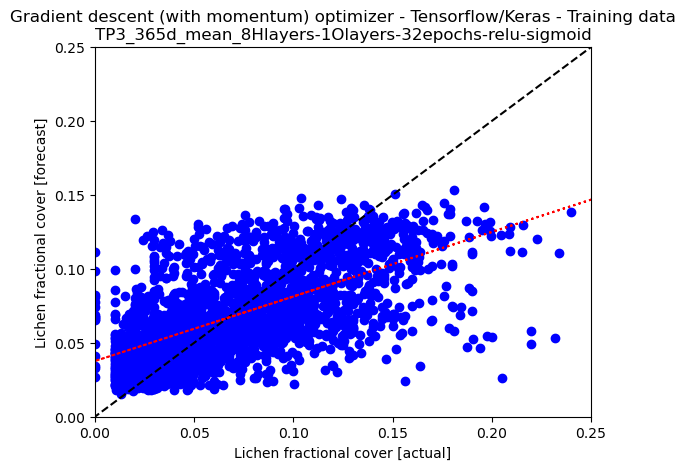

In [23]:
# Forecast vs. actual Values xy-plot - Training data

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(y_train, y_check, marker = 'o', c = 'blue')
plt.plot([-5,20], [-5,20], color = 'black', ls = '--')
plt.plot(y_train['new_Lichen_mean'], m * y_train['new_Lichen_mean'] + b, color = 'red', ls = 'dotted')

plt.ylabel('Lichen fractional cover [forecast]')
plt.xlabel('Lichen fractional cover [actual]')
plt.title('Gradient descent (with momentum) optimizer - Tensorflow/Keras - Training data\n' + expname)

plt.ylim(0., 0.25)
plt.xlim(0., 0.25)

plt.axis(True)
plt.show()

In [24]:
y_train = y_train.reset_index()
y_train = y_train.drop(columns=['index'])

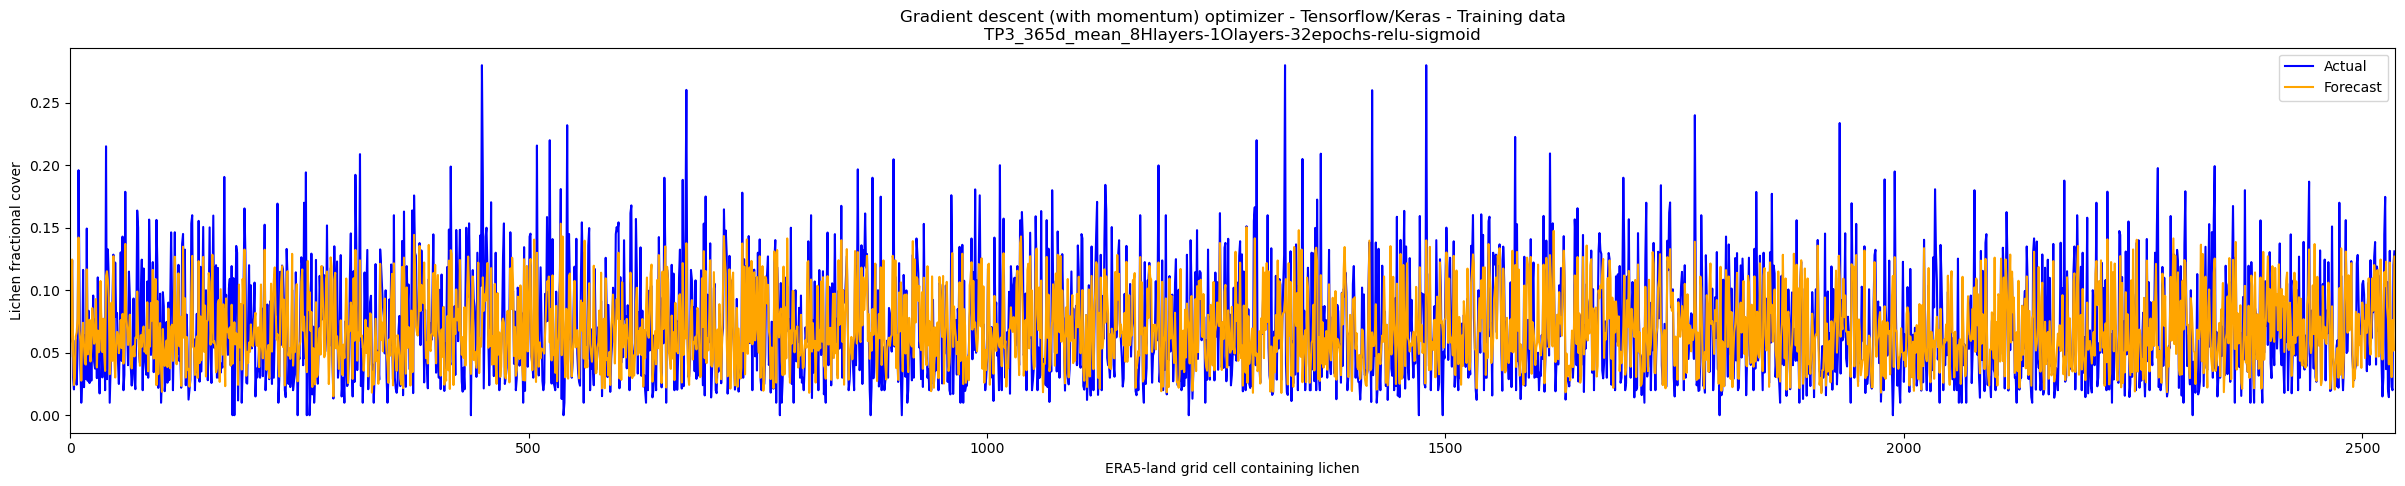

In [25]:
# Forecast vs. actual Values linear-plot - Training data

fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(111)

plt.plot(y_train, c = 'blue')
plt.plot(y_check, c = 'orange')

plt.ylabel('Lichen fractional cover')
plt.xlabel('ERA5-land grid cell containing lichen')
plt.title('Gradient descent (with momentum) optimizer - Tensorflow/Keras - Training data\n' + expname)

plt.xlim(0., len(y_train))
ax.legend(['Actual', 'Forecast'])

In [26]:
print('Finished!')

Finished!
